In [1]:
import numpy as np
import tensorflow as tf
import h5py as h5
from cnn import GTSRB_Classifier

/home/flo/anaconda3/envs/tftest/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
hf = h5.File('./data/gtsrb_data.h5', 'r')
data = {k: np.array(v) for k,v in hf.items()}
hf.close()

In [3]:
gtsrb_cl = GTSRB_Classifier()

In [4]:
gtsrb_cl.create_classifier(model_dir='./models')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './models', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fca001ebd30>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [5]:
gtsrb_cl.evaluate(eval_data=data['test_data'].astype(np.float32), eval_labels=data['test_labels'].astype(np.int32), num_epochs=1)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-26-09:10:43
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./models/model.ckpt-73210
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-26-09:11:36
INFO:tensorflow:Saving dict for global step 73210: accuracy = 0.9738717, global_step = 73210, loss = 0.14950557
{'accuracy': 0.9738717, 'loss': 0.14950557, 'global_step': 73210}


In [6]:
class_names = ['MAX_TWENTY', 'MAX_THIRTY', 'MAX_FIFTY', 'MAX_SIXTY', 'MAX_SEVENTY',
                 'MAX_EIGHTY', 'CLEAR_MAX_EIGHTY', 'MAX_HUNDRED', 'MAX_HUNDRED_TWENTY', 'NO_OVERTAKING',
                 'NO_OVERTAKING_TRUCK', 'CROSSROADS_AHEAD', 'MAJOR_ROAD', 'YIELD', 'STOP',
                 'NO_ENTRY_CARS', 'NO_TRUCKS', 'NO_ENTRY', 'DANGER', 'BEND_LEFT',
                 'BEND_RIGHT', 'DOUBLE_BEND', 'UNEVEN_ROAD', 'SLIPPERY_ROAD', 'ROAD_NARROWS',
                 'ROAD_WORKS', 'TRAFFIC_LIGHTS', 'PEDESTRIANS', 'CHILDREN', 'BYCICLISTS',
                 'FROST', 'WILD_ANIMALS', 'CLEAR_SPEED_LIMIT', 'TURN_RIGHT_ONLY', 'TURN_LEFT_ONLY',
                 'AHEAD_ONLY', 'AHEAD_OR_RIGHT', 'AHEAD_OR_LEFT', 'PASS_RIGHT', 'PASS_LEFT',
                 'ROUNDABOUT', 'CLEAR_NO_OVERTAKING', 'CLEAR_NO_OVERTAKING_TRUCK']
fcs, acc = gtsrb_cl.detailed_evaluation(eval_data=data['test_data'].astype(np.float32), eval_labels=data['test_labels'].astype(np.int32), num_epochs=1, class_names=class_names)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./models/model.ckpt-73210
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
total classification performance: 97.39 percent
classification performance for class 0 (MAX_TWENTY): 83.33
classification performance for class 1 (MAX_THIRTY): 98.33
classification performance for class 2 (MAX_FIFTY): 99.60
classification performance for class 3 (MAX_SIXTY): 92.00
classification performance for class 4 (MAX_SEVENTY): 96.52
classification performance for class 5 (MAX_EIGHTY): 97.62
classification performance for class 6 (CLEAR_MAX_EIGHTY): 88.67
classification performance for class 7 (MAX_HUNDRED): 92.44
classification performance for class 8 (MAX_HUNDRED_TWENTY): 99.78
classification performance for class 9 (NO_OVERTAKING): 99.79
classification performance for class 10 (NO_OVERTAKING_TRUCK): 99.24
classification 

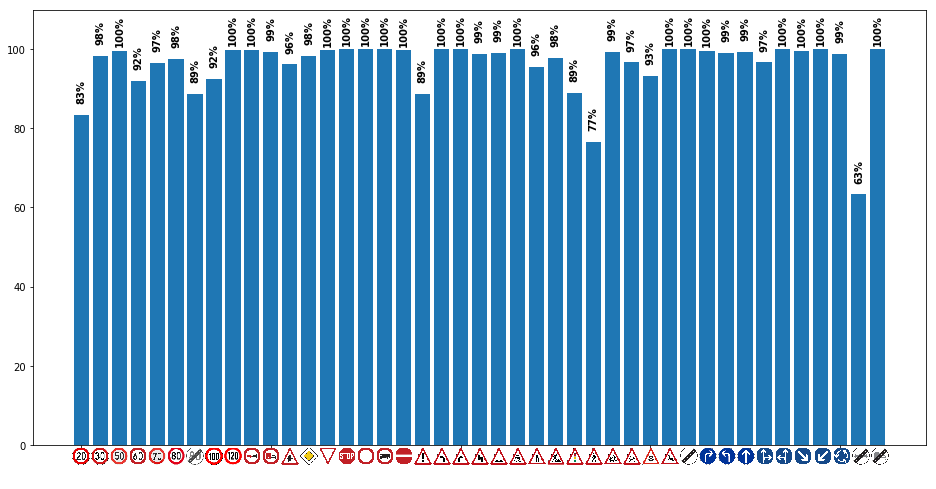

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

ax.bar(np.arange(43), acc, tick_label=None)
ax.set_ylim([0,110])
# replace x-ticks with corresponding imgs

for i, v in enumerate(acc):
    ax.text(i-0.25, v+7, '%1.0f%%'%v, fontsize=10, fontweight='bold', rotation=90)


# replace x-ticks with corresponding imgs
size=0.03
xl, yl, xh, yh=np.array(ax.get_position()).ravel()
xl+= 0.035
xh-= size
w=xh-xl
h=yh-yl

for ind in np.arange(43):
    
    xp=xl+w*((ind)/43) #if replace '0' label, can also be calculated systematically using xlim()
    yp=yl-size*0.5-0.02
    img=plt.imread('./TrafficSigns/%s.png'%(str(ind).zfill(2)))
    # ax.bar(np.arange(43), acc)
    ax1=fig.add_axes([xp-size*0.3, yp, size, size])
    ax1.axison = False
    imgplot = ax1.imshow(img)

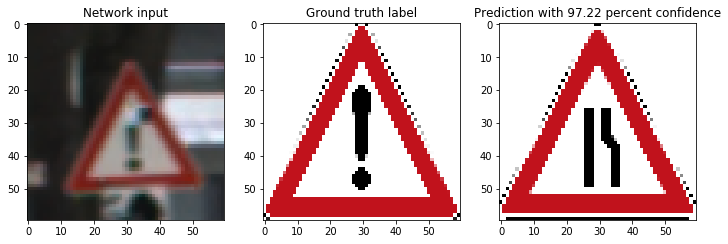

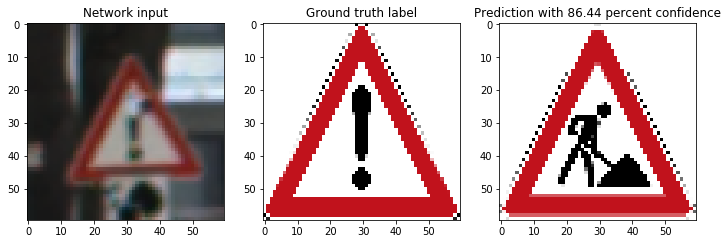

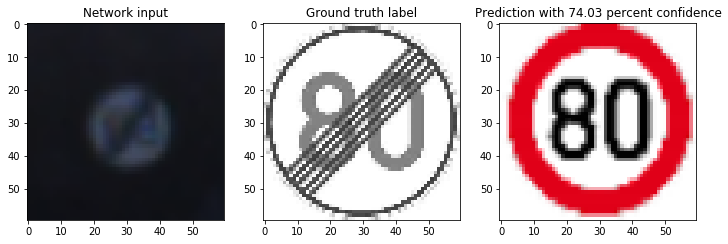

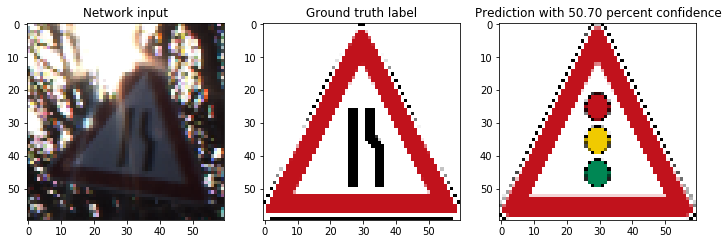

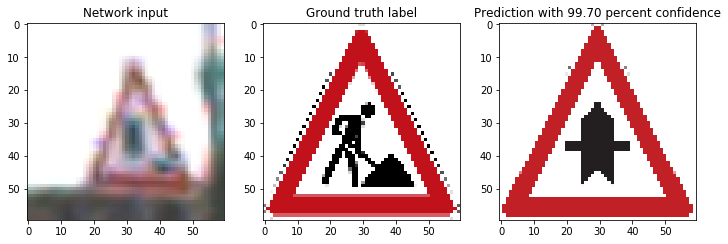

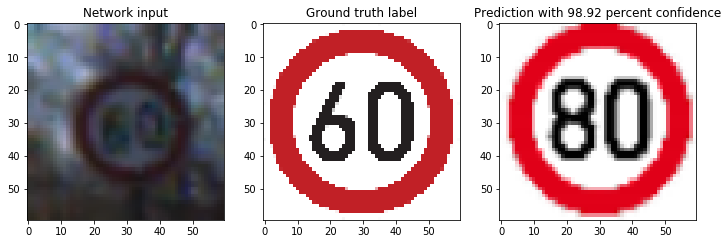

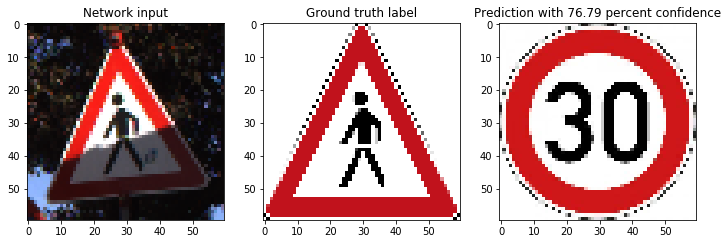

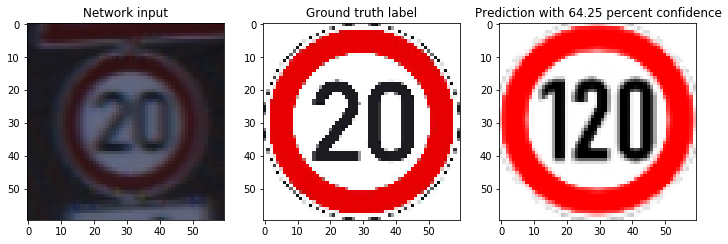

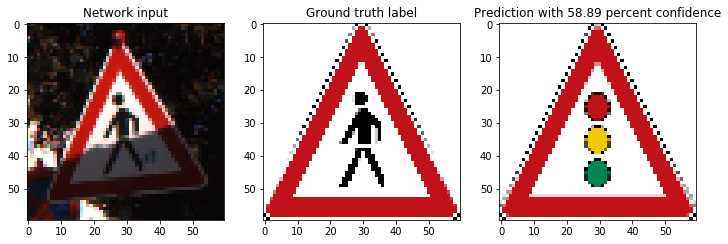

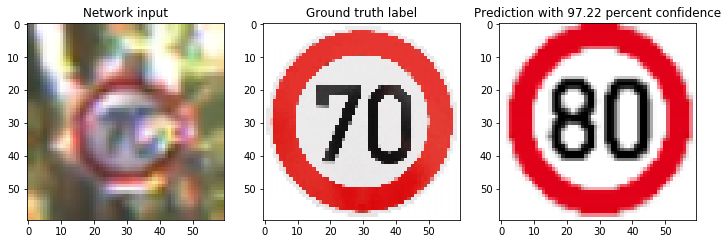

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import random
random.shuffle(fcs)
count = 0
max_count = 10
for i, p in enumerate(fcs):
    if count < max_count:
        img_gt = plt.imread('./TrafficSigns/'+str(int(p[2])).zfill(2)+'.png')
        img_pred = plt.imread('./TrafficSigns/'+str(int(p[1])).zfill(2)+'.png')
        fig = plt.figure(figsize=(12,6))
        fig.add_subplot(1,3,1)
        plt.imshow(np.reshape(data['test_data'][p[0]], (60,60,3)))
        plt.title('Network input')
        fig.add_subplot(1,3,2)
        plt.imshow(img_gt)
        plt.title('Ground truth label')
        fig.add_subplot(1,3,3)
        plt.imshow(img_pred)
        plt.title('Prediction with %1.2f percent confidence'%(p[3]*100))
        count += 1
    else:
        break